In [34]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torch.optim as optim
import torchvision.datasets as datasets
import imageio
import numpy as np
import matplotlib
from torchvision.utils import make_grid, save_image
from torch.utils.data import DataLoader
from matplotlib import pyplot as plt
from tqdm import tqdm

# Define learning parameters

In [35]:
# learning parameters
batch_size = 512
epochs = 100
sample_size = 64 # fixed sample size for generator
nz = 128 # latent vector size
k = 1 # number of steps to apply to the discriminator
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


In [36]:
print(device)

cpu


# Prepare training dataset

In [37]:
transform = transforms.Compose([
                                transforms.ToTensor(),
                                transforms.Normalize((0.5,),(0.5,)),
])
to_pil_image = transforms.ToPILImage()

# Make input, output folders
!mkdir -p input
!mkdir -p outputs

# Load train data
train_data = datasets.MNIST(
    root='input/data',
    train=True,
    download=True,
    transform=transform
)
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)

# Generator

In [38]:
class Generator(nn.Module):
    def __init__(self, nz):
        super(Generator, self).__init__()
        self.nz = nz
        self.main = nn.Sequential(
            nn.Linear(self.nz, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 512),
            nn.LeakyReLU(0.2),
            nn.Linear(512, 1024),
            nn.LeakyReLU(0.2),
            nn.Linear(1024, 784),
            nn.Tanh(),
        )
    def forward(self, x):
        return self.main(x).view(-1, 1, 28, 28)

# Discriminator

In [39]:
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.n_input = 784
        self.main = nn.Sequential(
            nn.Linear(self.n_input, 1024),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(1024, 512),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(256, 1),
            nn.Sigmoid(),
        )
    def forward(self, x):
        x = x.view(-1, 784)
        return self.main(x)

In [40]:
generator = Generator(nz).to(device)
discriminator = Discriminator().to(device)
print('##### GENERATOR #####')
print(generator)
print('######################')
print('\n##### DISCRIMINATOR #####')
print(discriminator)
print('######################')

##### GENERATOR #####
Generator(
  (main): Sequential(
    (0): Linear(in_features=128, out_features=256, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
    (2): Linear(in_features=256, out_features=512, bias=True)
    (3): LeakyReLU(negative_slope=0.2)
    (4): Linear(in_features=512, out_features=1024, bias=True)
    (5): LeakyReLU(negative_slope=0.2)
    (6): Linear(in_features=1024, out_features=784, bias=True)
    (7): Tanh()
  )
)
######################

##### DISCRIMINATOR #####
Discriminator(
  (main): Sequential(
    (0): Linear(in_features=784, out_features=1024, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
    (2): Dropout(p=0.3, inplace=False)
    (3): Linear(in_features=1024, out_features=512, bias=True)
    (4): LeakyReLU(negative_slope=0.2)
    (5): Dropout(p=0.3, inplace=False)
    (6): Linear(in_features=512, out_features=256, bias=True)
    (7): LeakyReLU(negative_slope=0.2)
    (8): Dropout(p=0.3, inplace=False)
    (9): Linear(in_features=256, out_features=1

# Tools for training

In [41]:
# optimizers
optim_g = optim.Adam(generator.parameters(), lr=0.0002)
optim_d = optim.Adam(discriminator.parameters(), lr=0.0002)

In [42]:
# loss function
criterion = nn.BCELoss() # Binary Cross Entropy loss

In [43]:
losses_g = [] # to store generator loss after each epoch
losses_d = [] # to store discriminator loss after each epoch
images = [] # to store images generatd by the generator

In [44]:
# to create real labels (1s)
def label_real(size):
    data = torch.ones(size, 1)
    return data.to(device)
# to create fake labels (0s)
def label_fake(size):
    data = torch.zeros(size, 1)
    return data.to(device)


In [45]:
# function to create the noise vector
def create_noise(sample_size, nz):
    return torch.randn(sample_size, nz).to(device)

In [46]:
# to save the images generated by the generator
def save_generator_image(image, path):
    save_image(image, path)

In [47]:
# create the noise vector - fixed to track how GAN is trained.
noise = create_noise(sample_size, nz)

# Q. Write training loop

  1%|          | 1/117 [00:00<00:28,  4.04it/s]

118it [00:20,  5.71it/s]                         


Epoch 1 of 100
Generator loss: -0.24097766, Discriminator loss: 0.45265841


118it [00:18,  6.36it/s]                         


Epoch 2 of 100
Generator loss: -0.00009043, Discriminator loss: 0.00012016


118it [00:18,  6.35it/s]                         


Epoch 3 of 100
Generator loss: -0.00008934, Discriminator loss: 0.00012059


118it [00:18,  6.37it/s]                         


Epoch 4 of 100
Generator loss: -0.00011719, Discriminator loss: 0.00014796


118it [00:19,  6.18it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


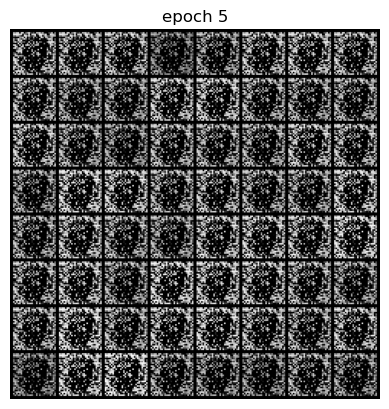

Epoch 5 of 100
Generator loss: -0.00678604, Discriminator loss: 0.05841731


118it [00:23,  4.93it/s]                         


Epoch 6 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00001248


118it [00:24,  4.85it/s]                         


Epoch 7 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000261


118it [00:24,  4.82it/s]                         


Epoch 8 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000223


118it [00:24,  4.84it/s]                         


Epoch 9 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000142


118it [00:24,  4.81it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


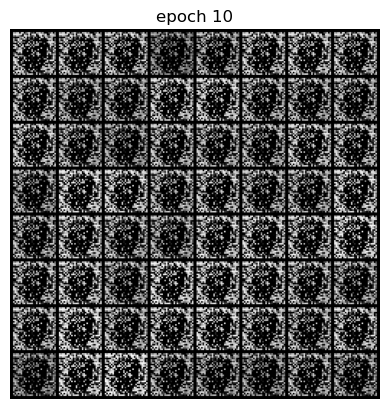

Epoch 10 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000133


118it [00:24,  4.79it/s]                         


Epoch 11 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000103


118it [00:24,  4.81it/s]                         


Epoch 12 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000251


118it [00:27,  4.30it/s]                         


Epoch 13 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000059


118it [00:24,  4.78it/s]                         


Epoch 14 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000047


118it [00:23,  4.94it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


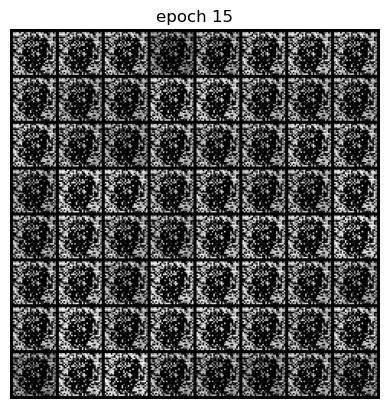

Epoch 15 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000041


118it [00:23,  5.12it/s]                         


Epoch 16 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000038


118it [00:22,  5.14it/s]                         


Epoch 17 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000045


118it [00:23,  5.11it/s]                         


Epoch 18 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000030


118it [00:23,  5.11it/s]                         


Epoch 19 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000030


118it [00:23,  5.10it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


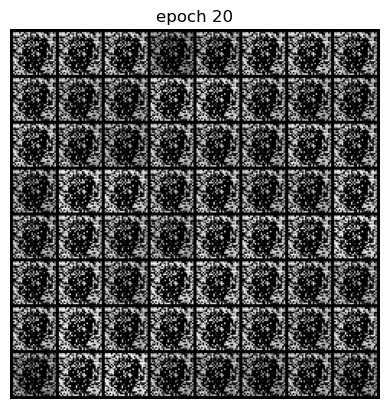

Epoch 20 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000023


118it [00:23,  5.04it/s]                         


Epoch 21 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000025


118it [00:23,  5.12it/s]                         


Epoch 22 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000022


118it [00:22,  5.16it/s]                         


Epoch 23 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000016


118it [00:23,  5.07it/s]                         


Epoch 24 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000018


118it [00:22,  5.13it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


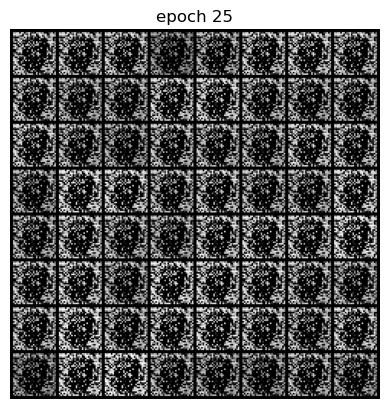

Epoch 25 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000017


118it [00:24,  4.90it/s]                         


Epoch 26 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000016


118it [00:28,  4.15it/s]                         


Epoch 27 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000012


118it [00:26,  4.40it/s]                         


Epoch 28 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000013


118it [00:26,  4.49it/s]                         


Epoch 29 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000013


118it [00:26,  4.50it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


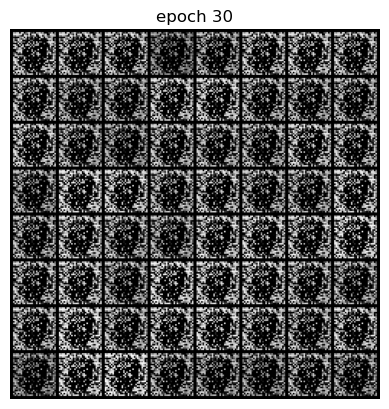

Epoch 30 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000015


118it [00:26,  4.44it/s]                         


Epoch 31 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000010


118it [00:25,  4.67it/s]                         


Epoch 32 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000008


118it [00:25,  4.66it/s]                         


Epoch 33 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000010


118it [00:25,  4.64it/s]                         


Epoch 34 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000008


118it [00:25,  4.67it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


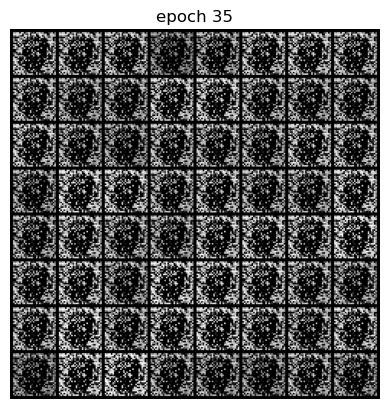

Epoch 35 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000009


118it [00:25,  4.63it/s]                         


Epoch 36 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000008


118it [01:41,  1.16it/s]                         


Epoch 37 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000011


118it [00:26,  4.38it/s]                         


Epoch 38 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000007


118it [00:25,  4.56it/s]                         


Epoch 39 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000008


118it [00:26,  4.40it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


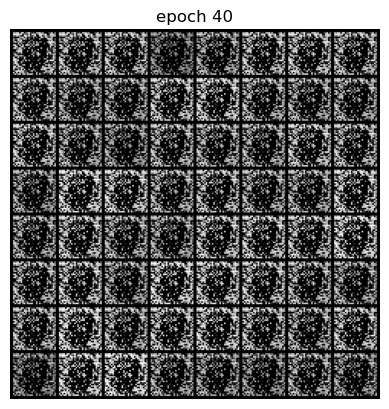

Epoch 40 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000007


118it [00:26,  4.51it/s]                         


Epoch 41 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000005


118it [00:26,  4.51it/s]                         


Epoch 42 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000006


118it [00:30,  3.93it/s]                         


Epoch 43 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000006


118it [00:27,  4.31it/s]                         


Epoch 44 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000005


118it [00:24,  4.79it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


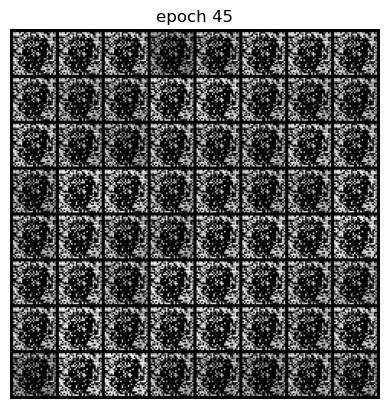

Epoch 45 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000004


118it [00:24,  4.79it/s]                         


Epoch 46 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000004


118it [00:26,  4.48it/s]                         


Epoch 47 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000003


118it [00:27,  4.27it/s]                         


Epoch 48 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000004


118it [00:29,  4.05it/s]                         


Epoch 49 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000003


118it [00:27,  4.28it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


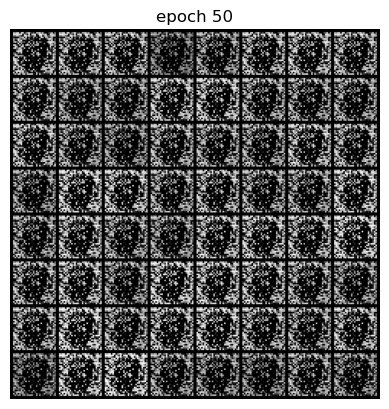

Epoch 50 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000004


118it [00:26,  4.38it/s]                         


Epoch 51 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000003


118it [00:27,  4.29it/s]                         


Epoch 52 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000004


118it [00:27,  4.34it/s]                         


Epoch 53 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000003


118it [00:27,  4.26it/s]                         


Epoch 54 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000003


118it [00:27,  4.34it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


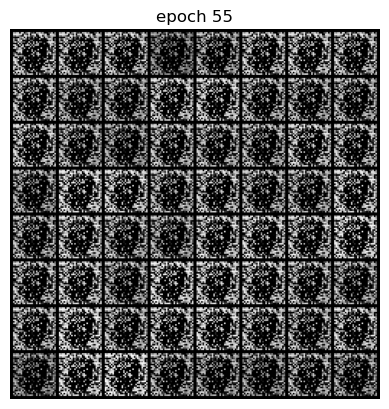

Epoch 55 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000003


118it [00:27,  4.32it/s]                         


Epoch 56 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000002


118it [00:27,  4.32it/s]                         


Epoch 57 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000003


118it [00:29,  4.05it/s]                         


Epoch 58 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000002


118it [00:28,  4.07it/s]                         


Epoch 59 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000002


118it [00:27,  4.25it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


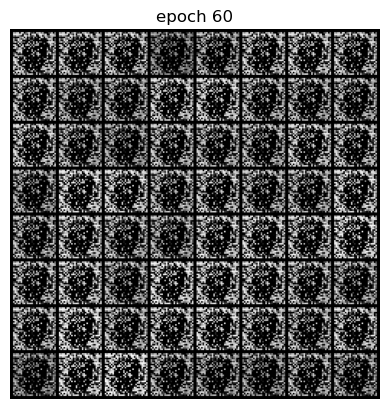

Epoch 60 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000002


118it [00:28,  4.18it/s]                         


Epoch 61 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000001


118it [00:31,  3.79it/s]                         


Epoch 62 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000001


118it [00:32,  3.64it/s]                         


Epoch 63 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000002


118it [00:33,  3.50it/s]                         


Epoch 64 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000002


118it [00:27,  4.28it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


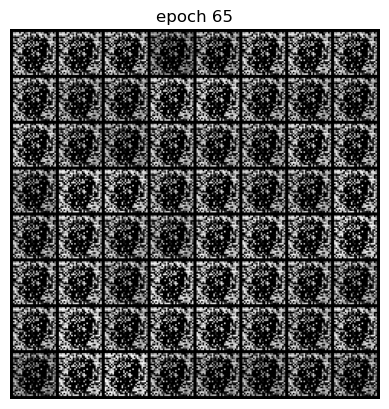

Epoch 65 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000001


118it [00:28,  4.08it/s]                         


Epoch 66 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000001


118it [00:28,  4.19it/s]                         


Epoch 67 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000001


118it [00:30,  3.83it/s]                         


Epoch 68 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000001


118it [00:33,  3.56it/s]                         


Epoch 69 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000001


118it [00:32,  3.68it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


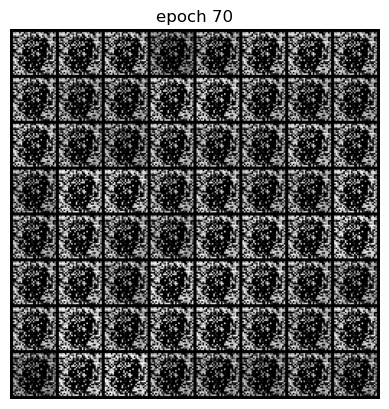

Epoch 70 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000001


118it [00:28,  4.07it/s]                         


Epoch 71 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000001


118it [00:26,  4.39it/s]                         


Epoch 72 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000001


118it [00:30,  3.89it/s]                         


Epoch 73 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000001


118it [00:33,  3.48it/s]                         


Epoch 74 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000001


118it [00:29,  3.97it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


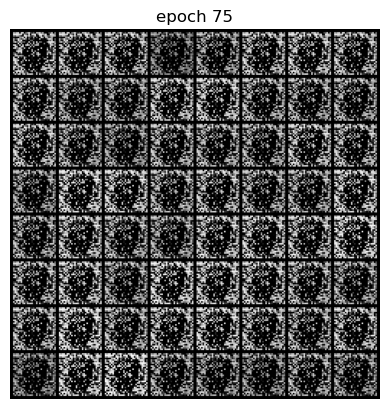

Epoch 75 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000001


118it [00:32,  3.63it/s]                         


Epoch 76 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000001


118it [00:32,  3.61it/s]                         


Epoch 77 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000001


118it [00:30,  3.84it/s]                         


Epoch 78 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000001


118it [00:32,  3.68it/s]                         


Epoch 79 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000001


118it [00:29,  3.96it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


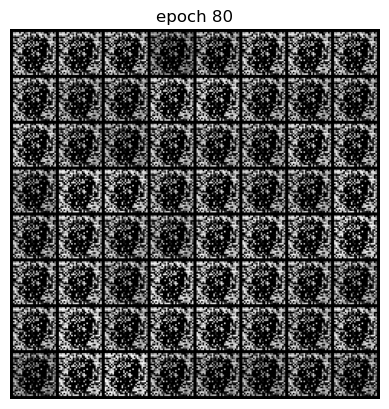

Epoch 80 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000001


118it [00:32,  3.61it/s]                         


Epoch 81 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:31,  3.80it/s]                         


Epoch 82 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:30,  3.81it/s]                         


Epoch 83 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:30,  3.88it/s]                         


Epoch 84 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:32,  3.67it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


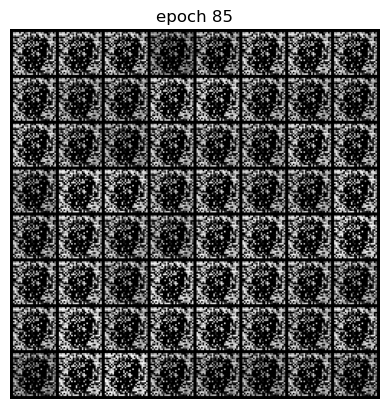

Epoch 85 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:34,  3.44it/s]                         


Epoch 86 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:32,  3.68it/s]                         


Epoch 87 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000001


118it [00:32,  3.61it/s]                         


Epoch 88 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:35,  3.31it/s]                         


Epoch 89 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:32,  3.60it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


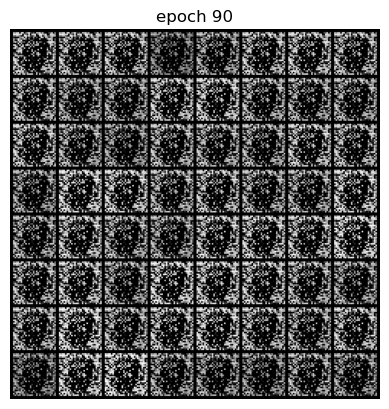

Epoch 90 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:32,  3.66it/s]                         


Epoch 91 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:31,  3.74it/s]                         


Epoch 92 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:30,  3.81it/s]                         


Epoch 93 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000001


118it [00:31,  3.76it/s]                         


Epoch 94 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:30,  3.88it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


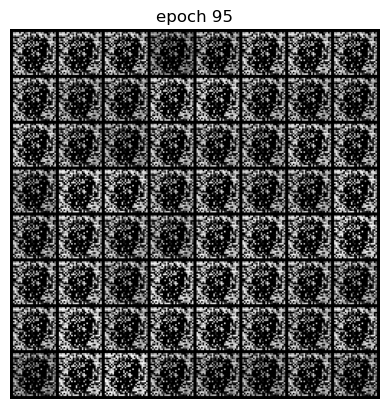

Epoch 95 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:31,  3.69it/s]                         


Epoch 96 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:32,  3.63it/s]                         


Epoch 97 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:30,  3.88it/s]                         


Epoch 98 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:30,  3.83it/s]                         


Epoch 99 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:31,  3.70it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


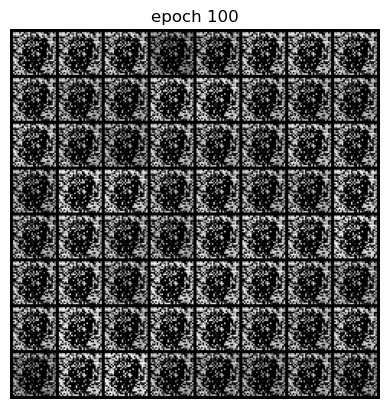

Epoch 100 of 100
Generator loss: -0.00000000, Discriminator loss: 0.00000000


In [48]:
torch.manual_seed(7777)

def generator_loss(fake_images):
    local_size = len(fake_images)
    fake_label = label_fake(local_size)
    optim_g.zero_grad()
    fake_output = discriminator(fake_images)
    loss = -criterion(fake_output, fake_label)
    loss.backward()
    optim_g.step()

    return loss

def discriminator_loss(fake_images, original_images):
    fake_local_size = len(fake_images)
    real_local_size = len(original_images)
    real_label = label_real(real_local_size)
    fake_label = label_fake(fake_local_size)
    optim_d.zero_grad()

    real_output = discriminator(original_images)
    loss_real = criterion(real_output, real_label)

    fake_output = discriminator(fake_images)
    loss_fake = criterion(fake_output, fake_label)

    total_loss = loss_real + loss_fake
    total_loss.backward()
    optim_d.step()

    return total_loss



for epoch in range(epochs):
    loss_g = 0.0
    loss_d = 0.0
    for bi, data in tqdm(enumerate(train_loader), total=int(len(train_data)/train_loader.batch_size)):
        real_images = data[0].to(device)
        for _ in range(k):
            new_noise = create_noise(batch_size, nz).detach()
            fake_images = generator(new_noise)
            loss_d += discriminator_loss(fake_images, real_images)

        fakes = generator(create_noise(batch_size, nz).detach())
        loss_g += generator_loss(fakes)

    # create the final fake image for the epoch
    generated_img = generator(noise).cpu().detach()

    # make the images as grid
    generated_img = make_grid(generated_img)

    # visualize generated images
    if (epoch + 1) % 5 == 0:
        plt.imshow(generated_img.permute(1, 2, 0))
        plt.title(f'epoch {epoch+1}')
        plt.axis('off')
        plt.show()

    # save the generated torch tensor models to disk
    save_generator_image(generated_img, f"outputs/gen_img{epoch+1}.png")
    images.append(generated_img)
    epoch_loss_g = loss_g / bi # total generator loss for the epoch
    epoch_loss_d = loss_d / bi # total discriminator loss for the epoch
    losses_g.append(epoch_loss_g)
    losses_d.append(epoch_loss_d)

    print(f"Epoch {epoch+1} of {epochs}")
    print(f"Generator loss: {epoch_loss_g:.8f}, Discriminator loss: {epoch_loss_d:.8f}")

In [49]:
print('DONE TRAINING')
torch.save(generator.state_dict(), 'outputs/generator.pth')

DONE TRAINING


In [50]:
# save the generated images as GIF file
imgs = [np.array(to_pil_image(img)) for img in images]
imageio.mimsave('outputs/generator_images.gif', imgs)

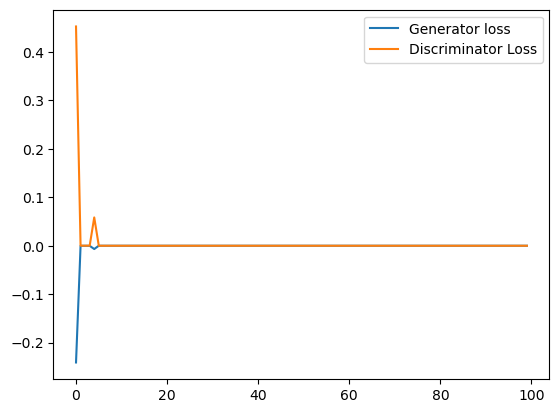

In [51]:
# plot and save the generator and discriminator loss
losses_g_n = [tensor.detach().numpy() for tensor in losses_g]
losses_d_n = [tensor.detach().numpy() for tensor in losses_d]
plt.figure()
plt.plot(losses_g_n, label='Generator loss')
plt.plot(losses_d_n, label='Discriminator Loss')
plt.legend()
plt.savefig('outputs/loss.png')